In [13]:
import pickle
import operator as op
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.insert(1, os.path.join(sys.path[0], '..'))


from collections import defaultdict
from constants import *

sns.set()

In [20]:
def make_boxplots(data_dict, hp_name, perf_measure, log_scaling):
    sorted_keys, sorted_vals = zip(*sorted(data_dict.items(), key=op.itemgetter(0)))
    ax = sns.boxplot(data=sorted_vals)
    ax = sns.swarmplot(data=sorted_vals, color=".25")
    ax.set(xlabel=hp_name, ylabel=perf_measure)
    plt.xticks(plt.xticks()[0], sorted_keys)
    plt.show()

def make_scatterplot(x, y, hp_name, perf_measure, log_scaling):
    ax = sns.scatterplot(x=x, y=y)     
    ax.set(xlabel=hp_name, ylabel=perf_measure)
    if log_scaling:
        ax.set_xscale("log")
        ax.set_xlim([min(x), max(x)])
    plt.show()
    

In [15]:
def plot_hps(hps_pkl_path):
    with open(hps_pkl_path, 'rb') as hps_pkl:
        hps = pickle.load(hps_pkl)
        for hp in hps:
            results = hps[hp]
            if hp in STRING_HP or hp in INT_HP or hp in INT_POWER_EXP or hp in BOOL_HP:
                acc_results = defaultdict(list)
                loss_results = defaultdict(list)
                for result in results:
                    # TODO: Use maps instead of dicts to allow for other metrics / non-hardcoded
                    acc_results[result[0]].append(result[2])
                    loss_results[result[0]].append(result[1])
                
                make_boxplots(acc_results, hp, "f1", log_scaling = hp in INT_POWER_EXP)
                make_boxplots(loss_results, hp, "loss", log_scaling = hp in INT_POWER_EXP)
                
                # create scatter plots for all the different values
            
            if hp in FLOAT_HP or hp in REAL_POWER_EXP:
                    
                vals = [result[0] for result in results]
                
                loss_results = [result[1] for result in results]
                acc_results = [result[2] for result in results]
                
                make_scatterplot(vals, loss_results, hp, "loss", log_scaling = hp in REAL_POWER_EXP)
                make_scatterplot(vals, acc_results, hp, "f1", log_scaling = hp in REAL_POWER_EXP)
            
            
            

hidden_dims


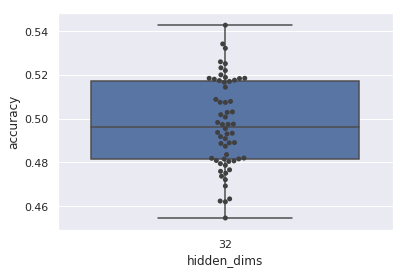

hidden_dims


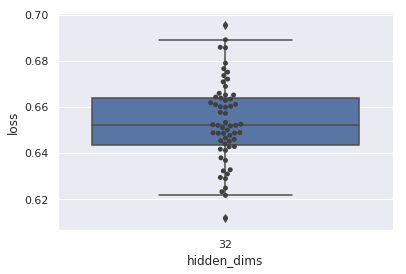

/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1e-08, right=1e-08


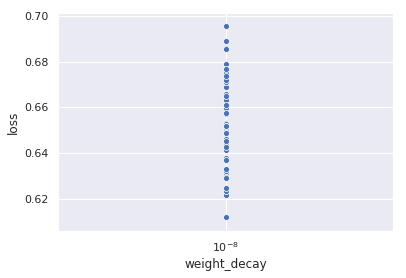

/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1e-08, right=1e-08


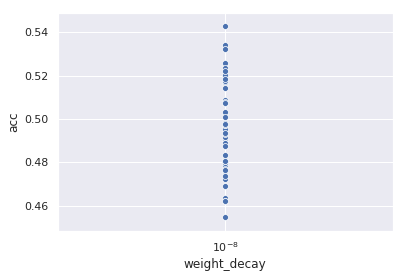

/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0001, right=0.0001


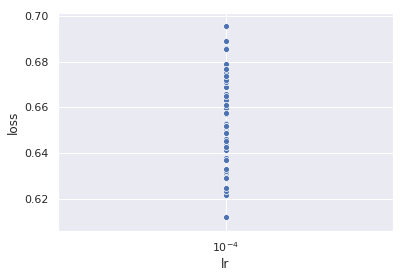

/home/robin/anaconda3/envs/croptype/lib/python3.6/site-packages/ipykernel/__main__.py:15: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0001, right=0.0001


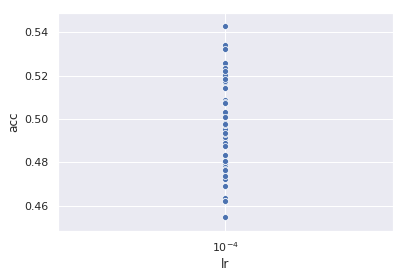

batch_size


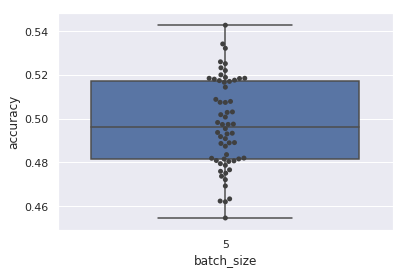

batch_size


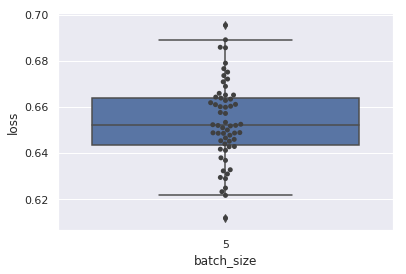

crnn_num_layers


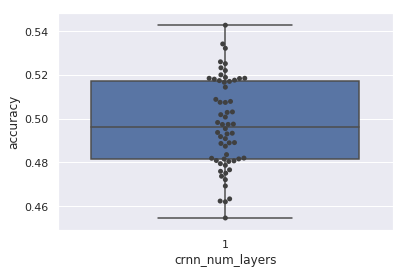

crnn_num_layers


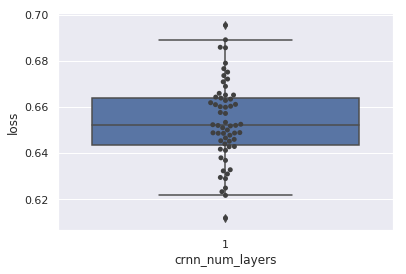

gamma


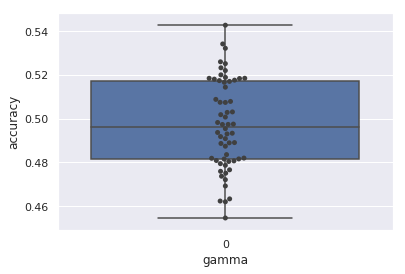

gamma


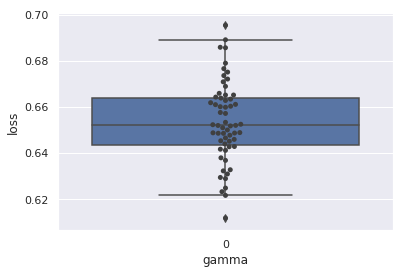

patience


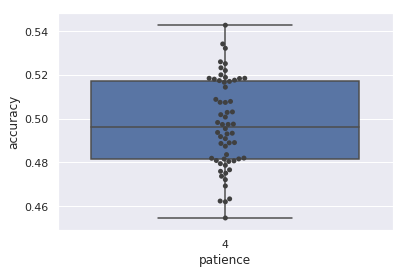

patience


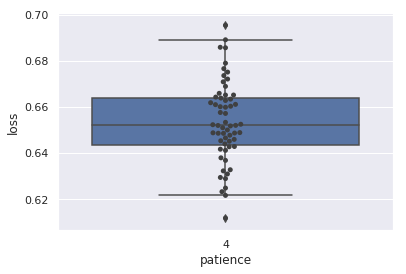

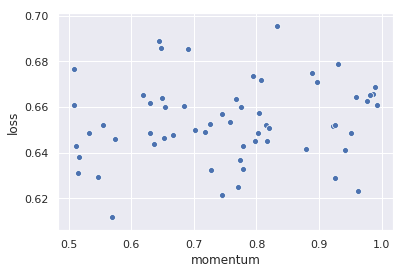

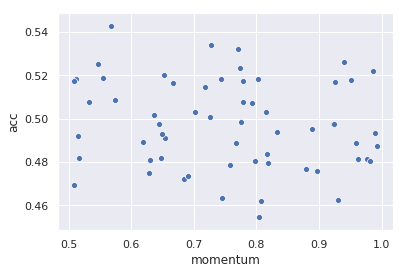

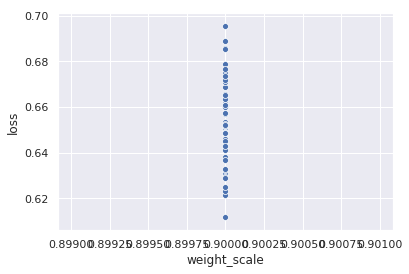

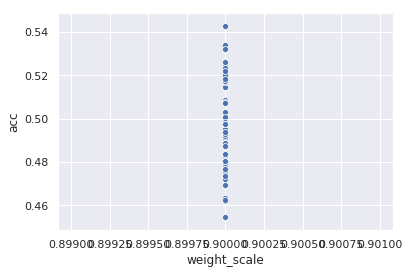

optimizer


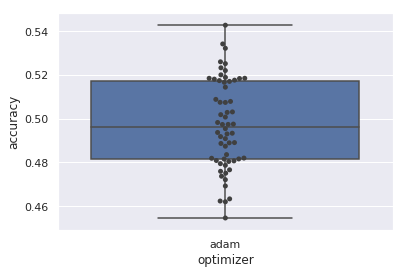

optimizer


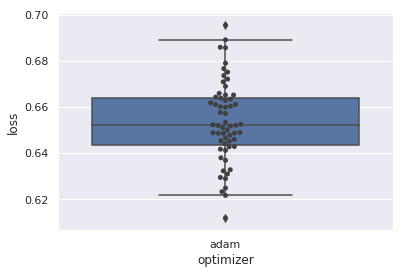

use_s1


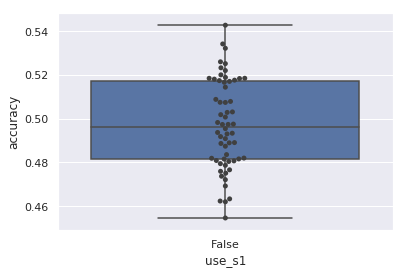

use_s1


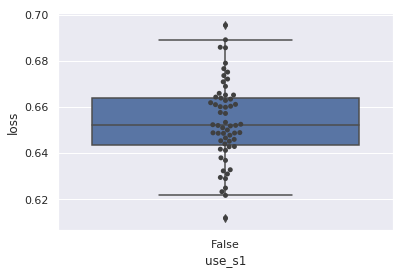

use_s2


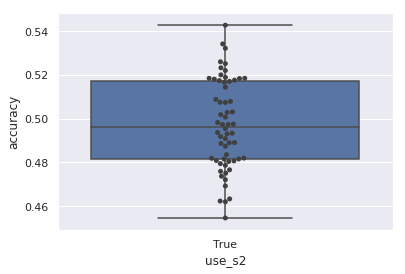

use_s2


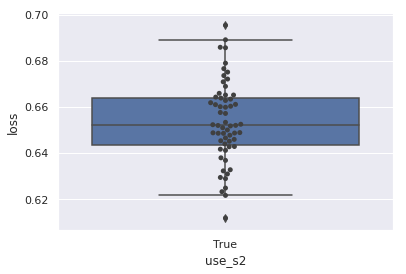

sample_w_clouds


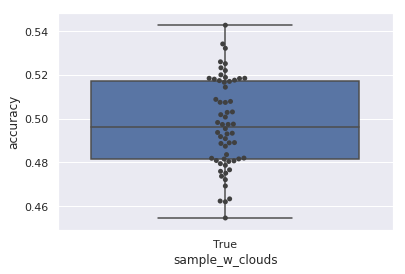

sample_w_clouds


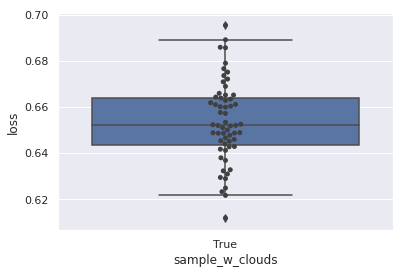

include_clouds


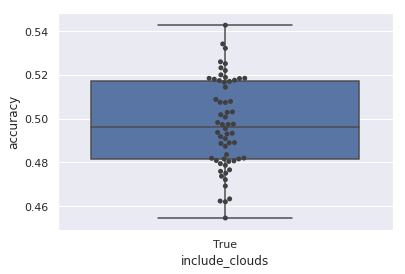

include_clouds


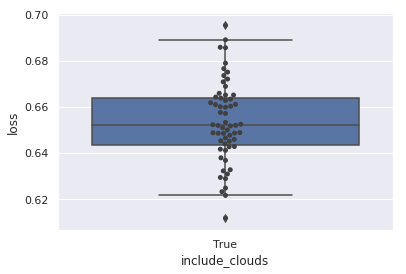

include_doy


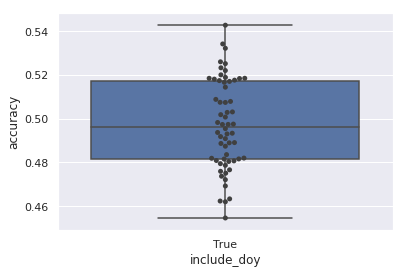

include_doy


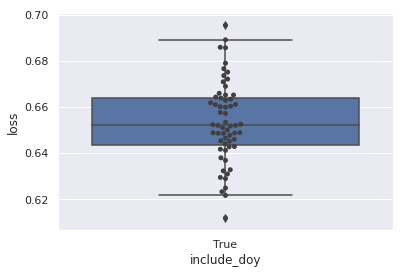

bidirectional


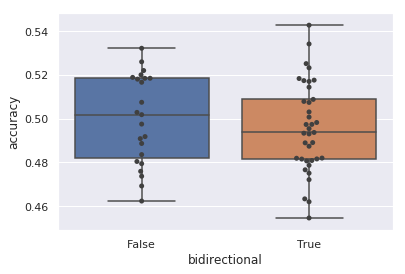

bidirectional


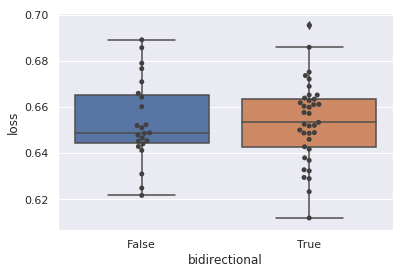

In [32]:
plot_hps('/home/robin/Documents/robin/crop-type-mapping/ghana_fcn_crnn_hps.pkl')